# Exploratory Data Analysis and Visualization

[Resource](https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-3/)



In [193]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [194]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline

import numpy as np
import scipy as np
import matplotlib as mpl
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

## Getting the mtcars dataset into shape

In [195]:
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


There's an ugly poorly named column. Let's fix that.

In [196]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [197]:
dfcars.shape

(32, 12)

We parse out a maker, which we shall later use to group cars.

In [198]:
dfcars['maker'] = dfcars.name.apply(lambda x: x.split()[0]) # Keeps the maker and adds it as a new column
dfcars['maker']

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

In [199]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


We can construct the `av_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean:

In [200]:
av_mpg = dfcars.groupby("maker").mpg.mean() # Note this dot notation for later
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

## Simple EDA

(as provided by Chris, a previous head-TF for cs109)

He says:

I'd like to suggest a basic rubric for the early stages of exploratory data analysis in Python. This isn't universally applicable, but it does cover many patterns which recur in several data analysis contexts. It's useful to keep this rubric in mind when encountering a new dataset.

The basic workflow is as follows:

1. Build a DataFrame from the data (ideally, put all data in this object)
2. Clean the DataFrame. It should have the following properties:
* Each row describes a single object
* Each column describes a property of that object
* Columns are numeric whenever appropriate
* Columns contain atomic properties that cannot be further decomposed
3. Explore global properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore group properties. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

So far we have built the dataframe, and carried out very minimal cleaning (renaming) in this dataframe.

## Exploring global properties

So lets focus on visualizing global properties of the data set below. For now, we shall only focus on mpg to illustrate the concepts, but you want to be doing this for all the columns. It may identify interesting properties and even errors in the data.

While we do this we shall see several examples of the `matplotlib` plotting experience.

We first use seaborn to set the global matplotlib plotting context. Here we set it to notebook which makes for reasonable sized graphics.

In [201]:
sns.set_context("notebook")
sns.set_color_codes()

Now we see maplotlib's default color palette, 'viridis'.

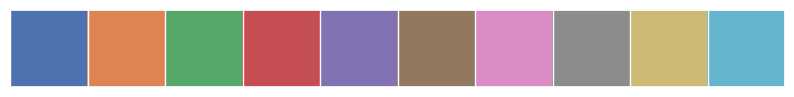

In [202]:
sns.palplot(sns.color_palette())

We can choose other palettes. The default palette is for qualitative data. It creates a color cycle we use in our plots. In other words, as we plot multiple things in a plot, it will use these colors one-by-one.

## Bar charts

We see that Pandas series are able to give us bar graphs.

<Axes: ylabel='maker'>

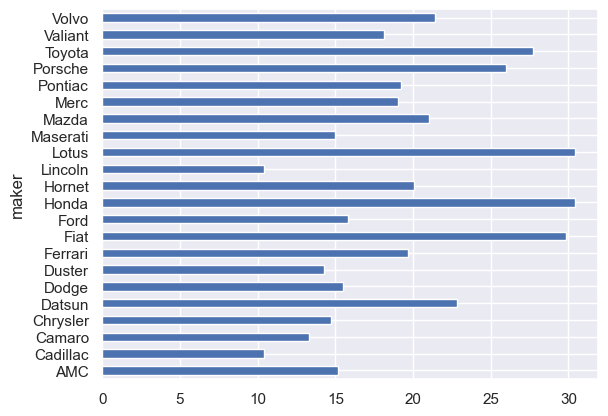

In [203]:
av_mpg.plot(kind='barh')

he then goes on to do some fancy plot visual changes. Waste of time. Let's move on.

## Histograms

Numerical data leads to distributions, and distributions to histograms. Here's the pandas default:

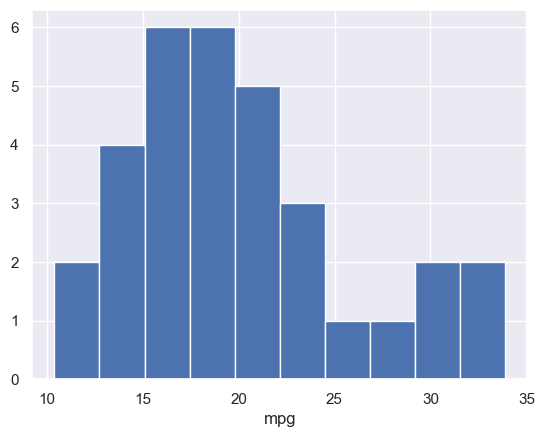

In [204]:
dfcars.mpg.hist()
plt.xlabel("mpg")
plt.show();

And matplotlib:

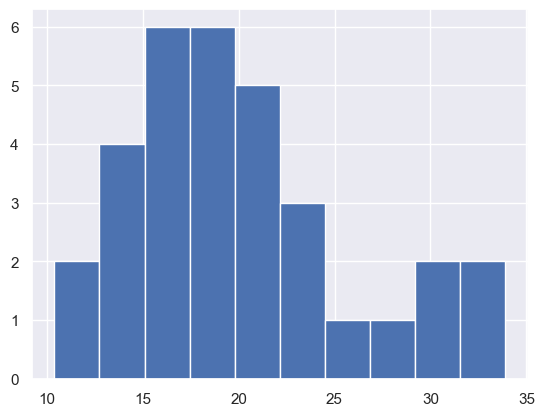

In [205]:
plt.hist(dfcars.mpg.values);

He then goes on to style it with seaborn. Yet another instance of wasted time. Main thing you need to know is that using the `values` method converts the data to a `numpy` array. Let's move on. 

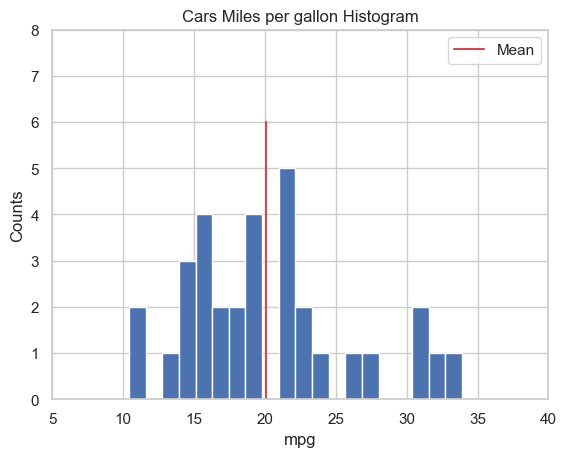

In [206]:
with sns.axes_style("whitegrid"):
    plt.hist(dfcars.mpg.values, bins=20)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

One can set bins using a list, and also label the histogram (not recommended but just for illustration). We also illustrate how to capture the color used and use it again

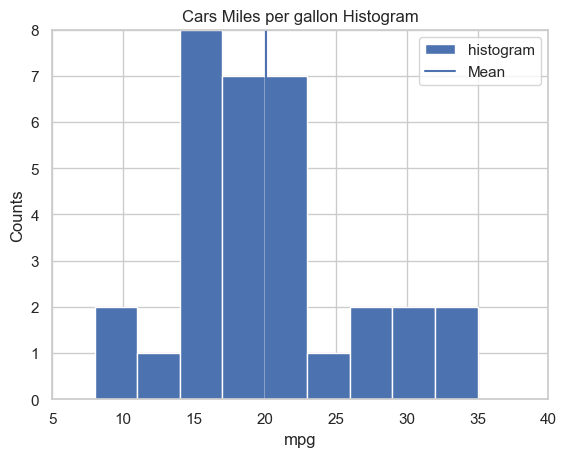

In [207]:

with sns.axes_style("whitegrid"):
    color = sns.color_palette()[0]
    plt.hist(dfcars.mpg.values, bins=range(5, 40, 3), label="histogram", color=color)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 1.0, color=color, label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

Seaborn very handily provides Kernel Density Estimates (KDE) which try to infer a probability distribution from the data. This is more useful when you have lots of data.

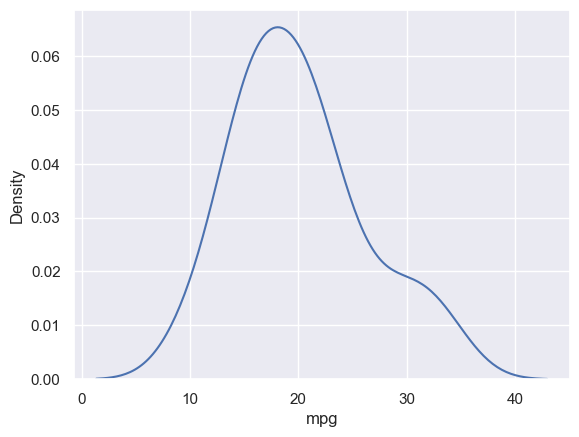

In [208]:
sns.set()
sns.kdeplot(dfcars.mpg);

And a histogram and a kdeplot together:

/var/folders/m_/f7m4q3pj7j3f6tby_sb7n5280000gn/T/ipykernel_8029/1170275590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfcars.mpg);


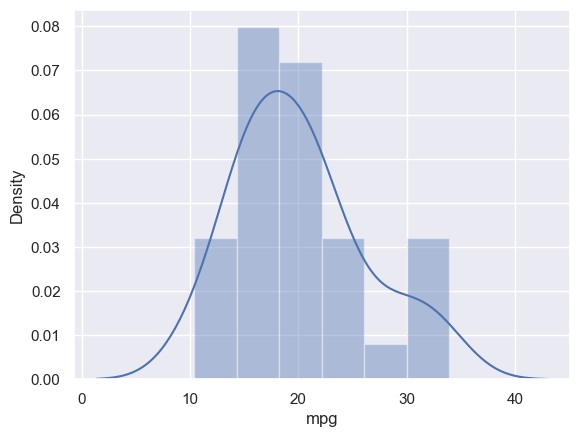

In [209]:
sns.distplot(dfcars.mpg);

## Plotting features against other features

Sometimes we want to see co-variation amongst our columns. A scatter-plot does this for us.

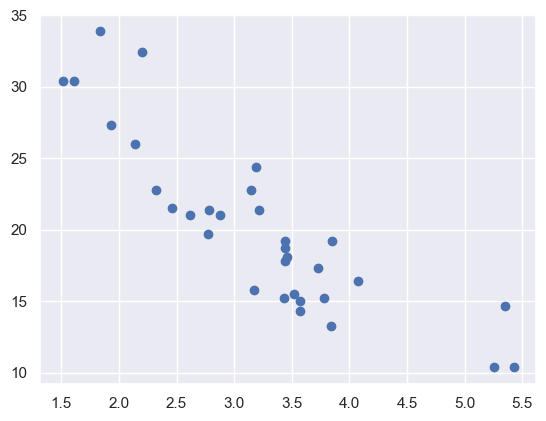

In [210]:
plt.scatter(dfcars.wt, dfcars.mpg)

We can also use `plot` without lines:

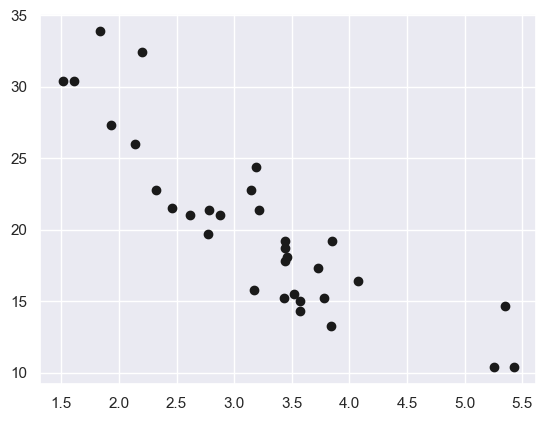

In [211]:
plt.plot(dfcars.wt, dfcars.mpg, marker="o", linestyle="None", color="k");

Usually we use `plt.show()` at the end of every plot to show the plot. Our magic incantation `%matplotlib inline` takes care of this for us, and we dont have to doit in the jupyter notebook. But if you run your puthon program from a file, you will need to explicitly have a call to show. Does not hurt us to include it...

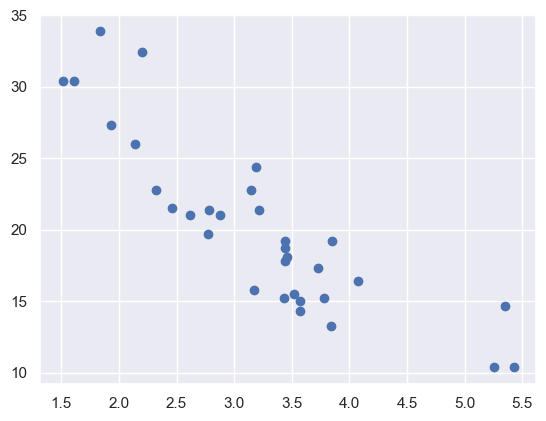

In [212]:
plt.plot(dfcars.wt, dfcars.mpg, "o")
plt.show()

But what if we want to save our figure into a file? The extension tells you how it will be saved..and note that the `savefig` needs to be in the same cell as the plotting commands. Go look at the files..

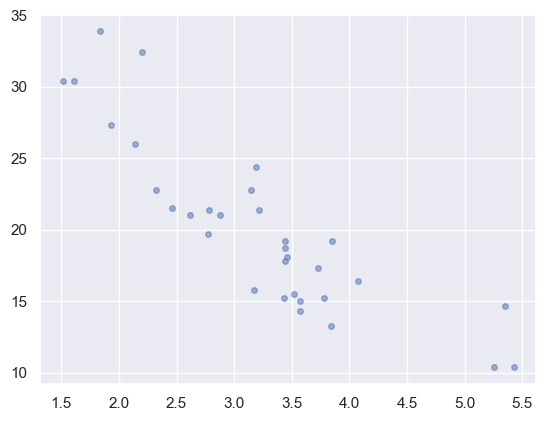

In [213]:
plt.plot(dfcars.wt, dfcars.mpg, "o", markersize=4, alpha=0.5)
#plt.savefig('foo1.pdf')
#plt.savefig('foo2.png', bbox_inches='tight') #less whitespace around image

## Trend

The correlation that we saw might suggest a trend. We can capture it with a "regression". Here, we show a quadratic fit with a 1 standard deviation bar to show the graphics aspect of this.

Review `polyfit` [here](https://www.youtube.com/watch?v=deKJ97HYAPM).

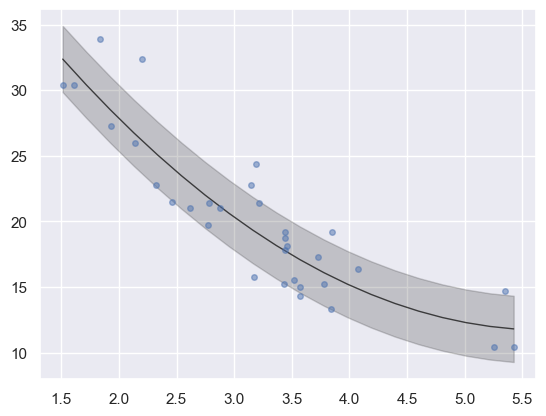

In [214]:
import numpy as np

x = dfcars.wt
y = dfcars.mpg
params = np.polyfit(x, y, 2) # Fit a polynomial with degree of 2 on ze data
xp = np.linspace(x.min(), x.max(), 20) 
yp = np.polyval(params, xp)

plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, color='k', alpha=0.2);

# Group Properties

Such "co-variational" plots, and even single-variable plots get a bit more interesting when we look at them **conditional** upon the value of a categorical variable.

Such conditionality is behind the notion of grouping, where we group our data by various values of categorical variables, for example, whether our cars have and automatic transmission or not.

## Grouping of one outcome variable

This notion of grouping based on combinations of factors is used by seaborn to make various easy-to-see exploratory visualizations for us. We shall first see how to make these plots quick-and-dirty(?) using `seaborn` and then see how we make them ourselves.

First, we make a boxplot of `mpg`, grouped by transmission style:

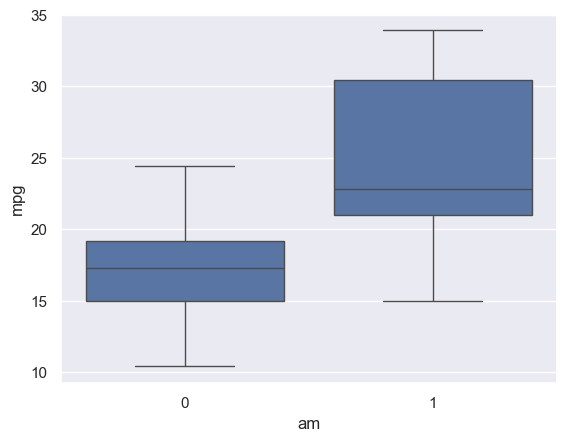

In [215]:
sns.boxplot(x='am', y='mpg', data=dfcars);

This box shows the quartiles of the distribution. This can also be done using a violin-plot, which uses KDE (Kernel Density Estimation) to show the distribution itself:

<Axes: xlabel='am', ylabel='mpg'>

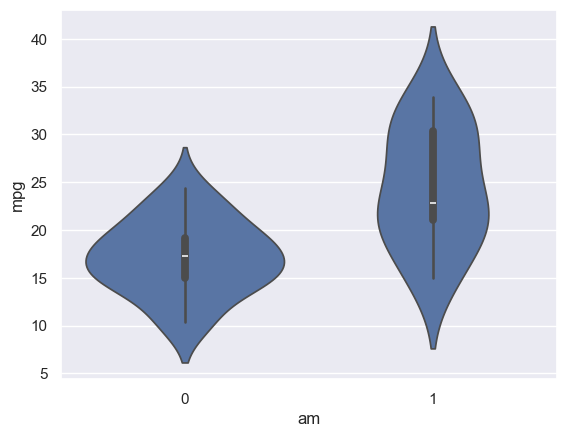

In [216]:
sns.violinplot(x='am', y='mpg', data=dfcars)

Automatics surveyed have a higher range of mpg, with higher fuel efficiency significant at 1 sigma, and we may want to investigate if this is a selection effect or whether there is some true impact of an automatic transmission. Further subgrouping the data is one way to do this.

Split violin plots can be used to do multiple categorical variables

<Axes: xlabel='cyl', ylabel='mpg'>

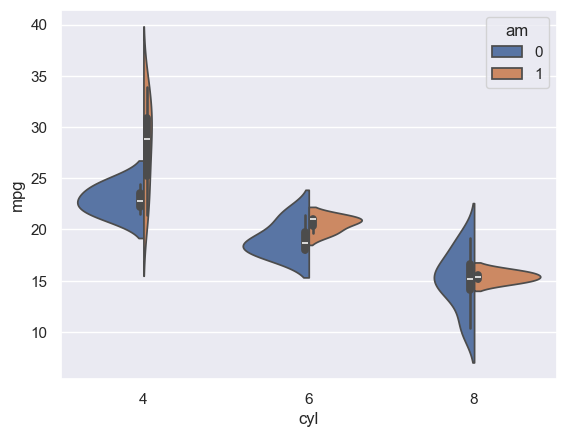

In [217]:
sns.violinplot(x='cyl', y='mpg', hue='am', order=[4, 6, 8], data=dfcars, split=True)

Once can see that the difference in mpg is starker between 6 and 8 cylinder cars for manual transmissions and that the large-range effect in automatics is coming almost entirely through 4-cylinder cars. What about the better mpg for automatics? Mostly in the 4 and 6 cylinders. But we ought to see how representative these are in our sample. We'll show how to do this soon but a cross-tabulation, combined with the graph above, gives us some idea that the poor miles per gallon for manual transmission may be coming from the preponderance of 8-cylinder manual cars in our dataset.

In [218]:
pd.crosstab(dfcars.am, dfcars.cyl)

cyl,4,6,8
am,,,
0,3,4,12
1,8,3,2


## Faceting for general grouping

Seaborn provides a nice construct: the `FacetGrid`. You decide what variables to facet over, and then decide the kind of plot you want. Here we want hue to be `am` and different columns in the plot grid to be cylinders. We then ask for a facet plot of `mpg` against `wt` scatter.

Such plots are often called small multiple plots. They repeat the same plot based on categories, making sure that all plotting parameters are the same so that we have direct comparability.

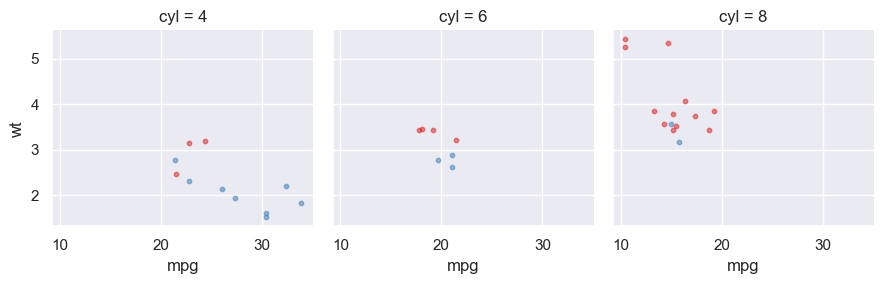

In [219]:
g = sns.FacetGrid(dfcars, col="cyl", hue="am", palette="Set1")
g.map(plt.scatter, "mpg", "wt", alpha=0.5, s=10);

We can see that the "regression-like" effect is cleanest for automatic transmissions in 4 cylinder cars.

## SPLOM, or Scatter Plot Matrix

We'd get tired if we had to so this on a 2-by-2 basis for every pair of continuously co-varying features. The `PairGrid`, colorable by transmission type, allows us to do this comparison for 5 continuous features here, with the diagonal being a kernel density estimate.

View [this video](https://www.youtube.com/watch?v=6sGOMbC5xdE) to better understand kernel density estimation.

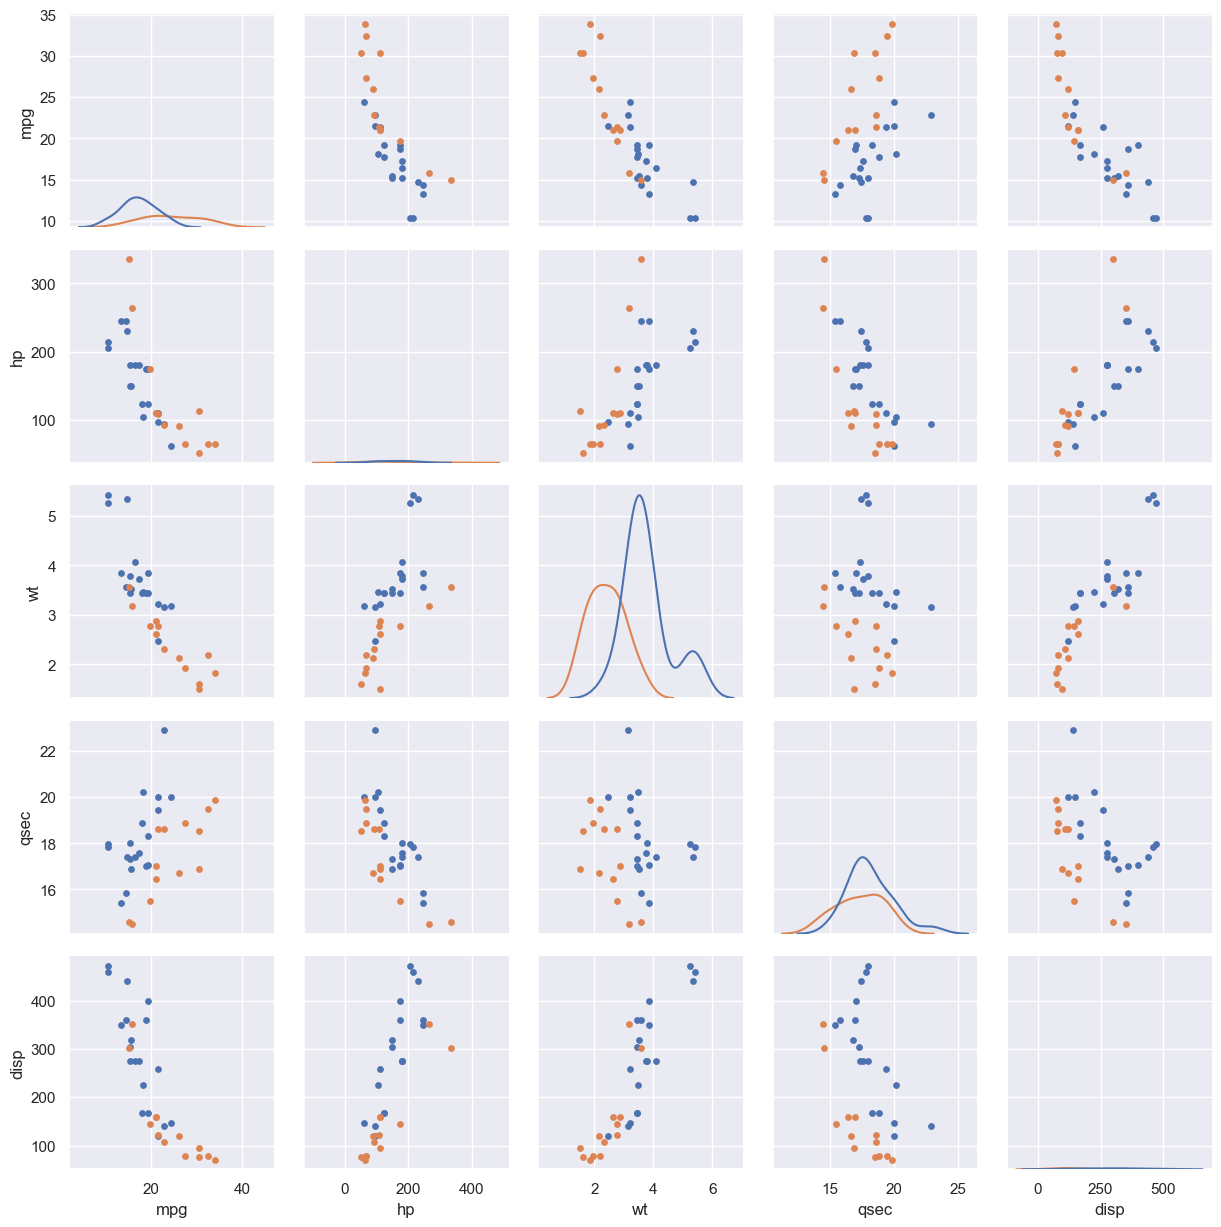

In [220]:
g = sns.PairGrid(dfcars, vars=["mpg", "hp", "wt", "qsec", "disp"], hue="am")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15);

In many places, for example `mpg` vs. `disp`, there seem to be two separate trends for the different transmissions. This will (as we shall see later in this course) suggest to us the addition of a transmission term as an **indicator variable** in regressions for `mpg` against various features. This changes the intercept of the regression. But the trends have different slopes as well, which suggests that `disp` may interact with `am` to create a varying slope as well.

## Correlation

The SPLOM seems to suggest correlations. Let's calculate these correlations the:

In [221]:
print(dfcars[["mpg", "wt", "hp", "qsec", "disp"]].corr())

           mpg        wt        hp      qsec      disp
mpg   1.000000 -0.867659 -0.776168  0.418684 -0.847551
wt   -0.867659  1.000000  0.658748 -0.174716  0.887980
hp   -0.776168  0.658748  1.000000 -0.708223  0.790949
qsec  0.418684 -0.174716 -0.708223  1.000000 -0.433698
disp -0.847551  0.887980  0.790949 -0.433698  1.000000


Since correlations range from -1 to 1 through 0, a diverging palette is probably our best bet.

We use `matplotlib`'s correlation plot. You'll end up doing plots like this for both EDA and to see misclassification from your ML algorithms. In other words, **EDA is even useful at the analysis stage**.

Check out [this page](https://seaborn.pydata.org/tutorial/color_palettes.html) for color palettes when using `cmap`.

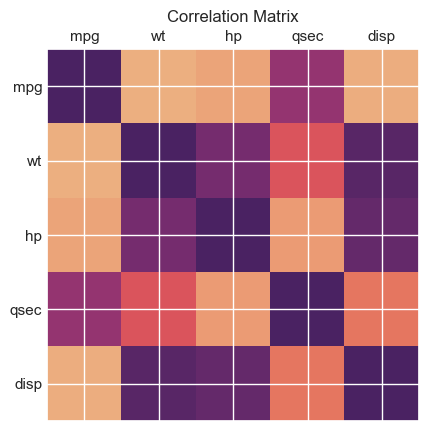

In [222]:
dpal = sns.color_palette("flare", as_cmap=True)

plt.matshow(dfcars[["mpg", "wt", "hp", "qsec", "disp"]].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis="both", which="both", length=0);
plt.title("Correlation Matrix")
plt.xticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp']);

## KDE plots and sequential palettes

Here we make a KDE plot of a multivariate normal distribution. Since a probability density is strictly positive, with values near 0 not being so interesting, a sequential palette is our ticket. Seaborn will by default provide such a palette for KDE plots, but you can use your own! 

(We'll figure this out later)

# Matplotlib and multiple plots: Small Multiples

There are many cases where we want to see plots side by side. The SPLOMS and Facet grids that seaborn makes for us are an example. But we should know how to do this on our own.

Here's a simple example of a plot with one column and 3 rows. It illustrates one way of doing this:

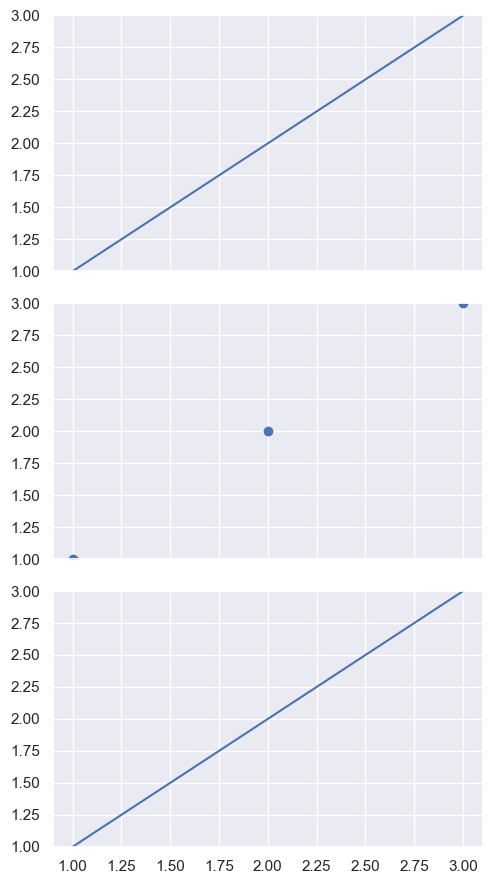

In [223]:
fig = plt.figure(figsize=(5, 9))

ax1 = fig.add_subplot(311)
ax1.plot([1, 2, 3], [1, 2, 3])
ax1.set_xticklabels([])
ax1.set_ylim([1.0, 3.0])

ax2 = fig.add_subplot(312)
ax2.scatter([1, 2, 3], [1, 2, 3])
ax2.set_xticklabels([])
ax2.set_ylim([1.0, 3.0])

ax3 = fig.add_subplot(313)
ax3.plot([1, 2, 3], [1, 2, 3])
ax3.set_ylim([1.0, 3.0])

fig.tight_layout()

## Small multiples, youself

Here's another way, which to our beloved professor is far clearer than the `add_subplot` way,. It basically creates an array of plots and zips this array up with the various data grouped by categoried.

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: >]
(7, 13)


AttributeError: Polygon.set() got an unexpected keyword argument 'normed'

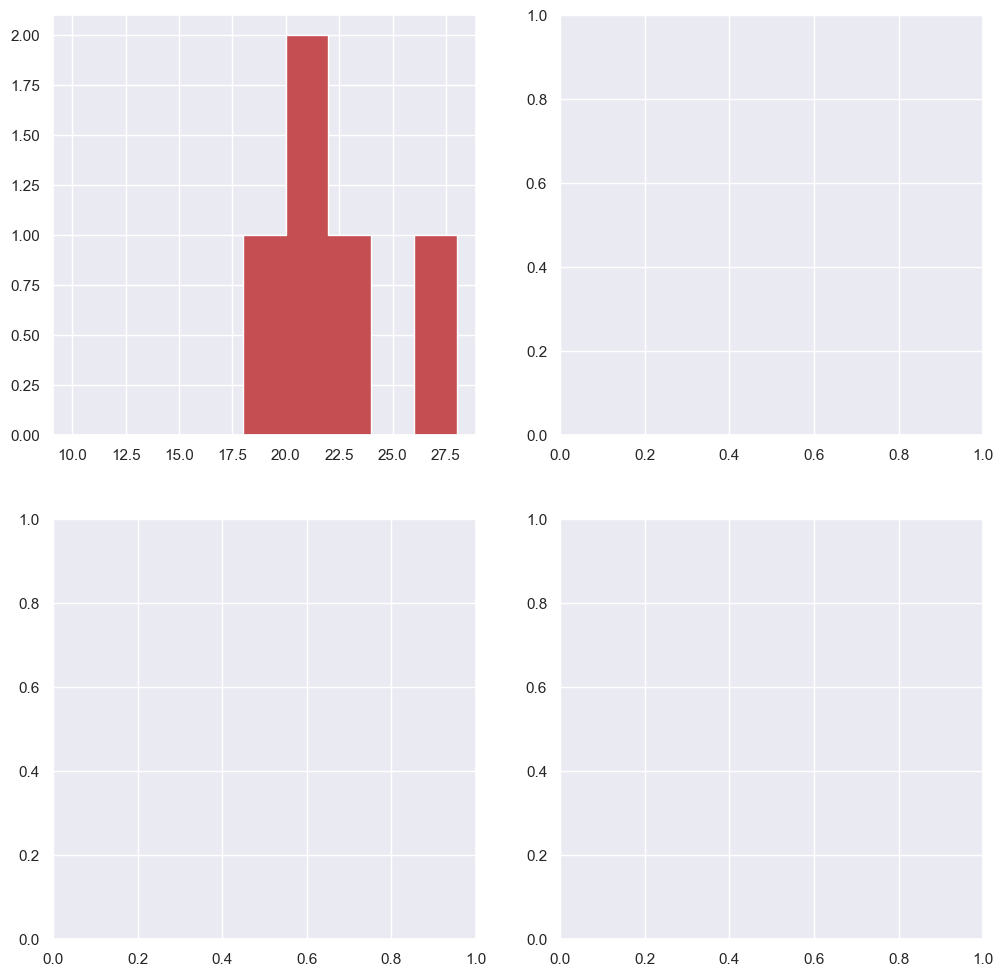

In [224]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
print(axes)
print(axes.ravel())
carbs = ['==1', '==2', '==3', '>=4']
bins = np.arange(10, 30, 2)
for ax, carb in zip(axes.ravel(), carbs):
    data = dfcars.query("carb%s" % carb)
    print(data.shape)
    #ax.plot(data.wt, data.mpg, 'o', markersize=10, alpha=0.5)
    ax.hist(data.mpg, bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.3)    
    ax.annotate("carb"+str(carb), xy=(12, 0.35), fontsize=14)
    #ax.set_yticks([])
    ax.set_ylim((0,0.4))
    ax.set_xlabel('mpg');

# The Interest in Science Problem

This comes from the lecture slides. Here's the data frame construction:

In [ ]:
science = {
    "interest": ["Excited", "Kind of interested", "OK", "Not great", "Bored"],
    "before": [19, 25, 40, 5, 11],
    "after": [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[["before", "after"]]
dfscience

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


## Multiple Pie Charts

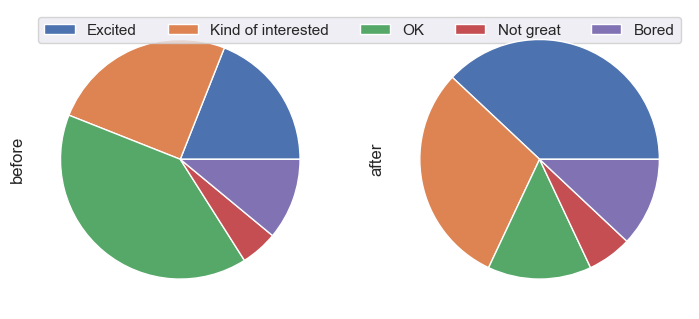

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (8.5, 4))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None);

## Before and after bar charts

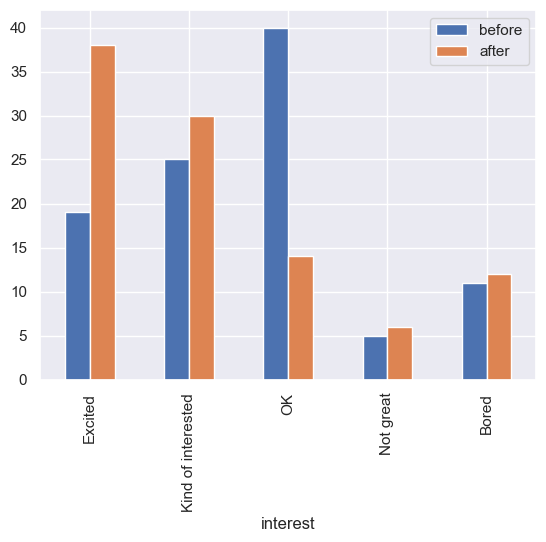

In [ ]:
dfscience.plot(kind="bar");

# Stacked Charts

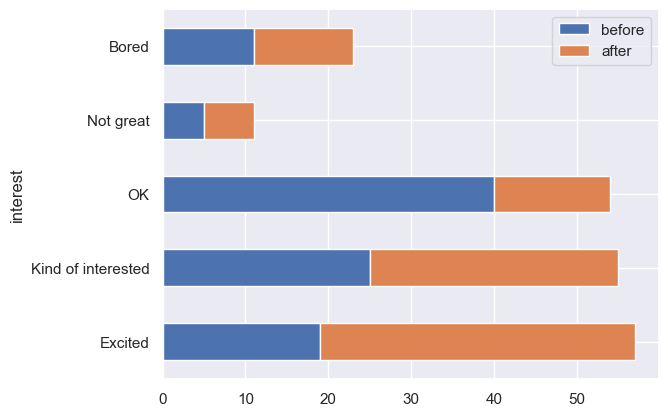

In [ ]:
dfscience.plot(kind="barh", stacked=True);

This, however, is hard to read. We want to compare the before and after easily. Sometimes the solution is a transpose:

In [ ]:
dfscience.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


We have to so some stuff to get the ordering right:

In [ ]:
dfst = dfscience.transpose()
dfst.iloc[[1, 0],:]

interest,Excited,Kind of interested,OK,Not great,Bored
after,38,30,14,6,12
before,19,25,40,5,11


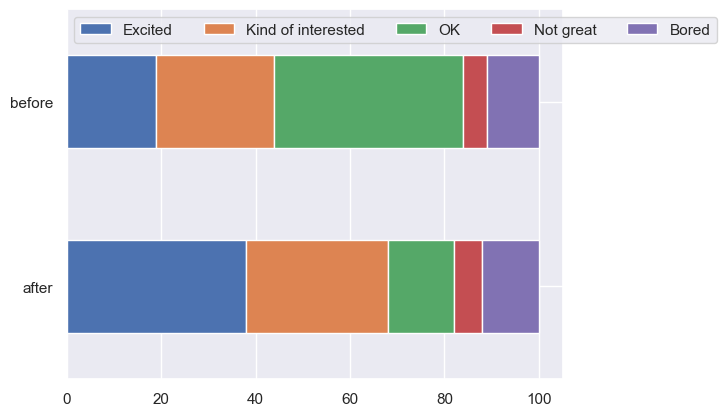

In [ ]:
dfscience.transpose().loc[["after", "before"], :].plot(kind="barh", stacked=True)
plt.legend(loc=2, ncol=5);

According to our beloved professor, this chart still has too much "chartjunk", but just asks students to try and improve it without offering a solution (fair).

## Difference bar chart

Sometimes a small data transformation makes the effect very obvious. Here we just make a bar chart of the change!

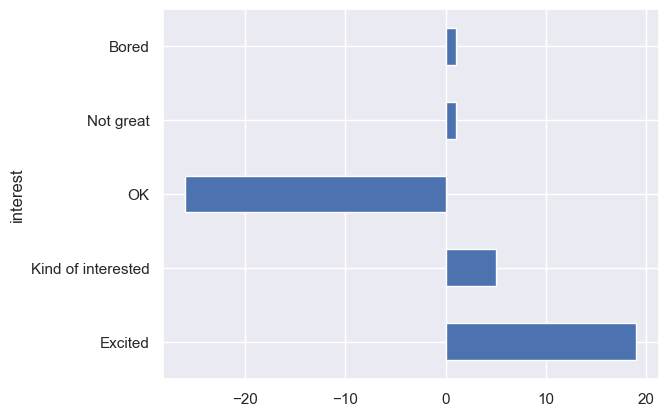

In [ ]:
(dfscience.after - dfscience.before).plot(kind="barh");

# EDA and Visualization Demo

[Resource](https://harvard-iacs.github.io/2018-CS109A/labs/lecture-3/notebook/)

In [ ]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML

styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In the above content we focused on the machinery needed to get data into a tabular form. Now we're going to focus on the visualization part of EDA. Here's a review of the EDA workflow:

# EDA Workflow

1. **Build** a DataFrame from the data (ideally, put all data in this object)

2. **Clean** the DataFrame. It should have the following properties
   - Each row describes a single object
   - Each column describes a property of that object
   - Columns are numeric whenever appropriate
   - Columns contain atomic properties that cannot be further decomposed

3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.

4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

In [ ]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm # Allows us easy access to color maps
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)
pd.set_option("display.notebook_repr_html", True)

# Getting the mtcars dataset into shape

The documentation for the data can be found [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html).

In [ ]:
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


There's a poorly named column on the 0 column index. Let's fix that:

In [ ]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
dfcars.shape

(32, 12)

We parse out a `maker`, which we shall later use to group cars.

In [ ]:
dfcars['maker'] = dfcars.name.apply(lambda x: x.split()[0])
dfcars["maker"]

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

This is what the dataframe looks like now:

In [ ]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


We can construct the `av_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean:

In [ ]:
av_mpg = dfcars.groupby("maker").mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

# Simple EDA

Let's reiterate the "basic workflow" provided earlier:

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)

2. **Clean** the DataFrame. It should have the following properties:
   - Each row describes a single object
   - Each column describes a property of that object
   - Columns are numeric whenever appropriate
   - Columns contain atomic properties that cannot be further decomposed

3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.

4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

So far we have built the dataframe, and carried out very minimal cleaning (renaming) in this dataframe.

## Exploring global properties

For now, we shall only focus on `mpg` to illustrate the concepts, but you want to be doing this for all the columns. It may identify interesting properties and even errors in the data.

We first use seaborn to set the global matplotlib plotting context. Here we set it to `notebook` which makes for reasonable sized graphics.

In [ ]:
sns.set_context("notebook")

Now let's see matplotlib's default color palette, "viridis":

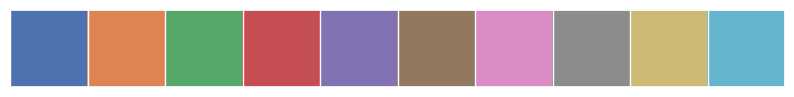

In [ ]:
sns.palplot(sns.color_palette());

We can choose other color palettes. **The default palette is for qualitative data**. It creates a color cycle we use in our plots. In other words, as we plot multiple things in a plot, it will use these colors one-by-one.

(Note: This is deprecated. You will need to figure out how to do this when you do your application.)

`output = sns.choose_colorbrewer_palette(data_type="qualitative")`

## Bar Charts

We see that Pandas series gives us bar graphs.

<Axes: ylabel='maker'>

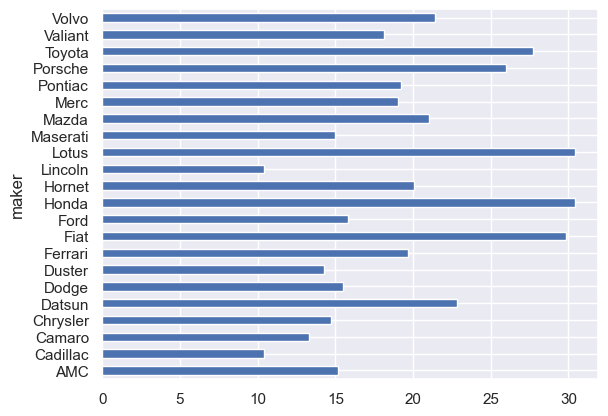

In [ ]:
av_mpg.plot(kind="barh")

Now let's clean this horizontal bar chart up a bit:

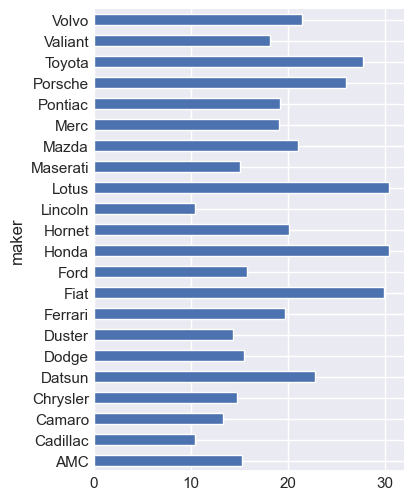

In [ ]:
plt.figure(figsize=(4, 6))
ax = plt.gca()
av_mpg.plot(kind="barh")
plt.grid(axis="x", color="white", linestyle="-")
ax.tick_params(axis="both", which="both", length=0)
sns.despine()

And more...

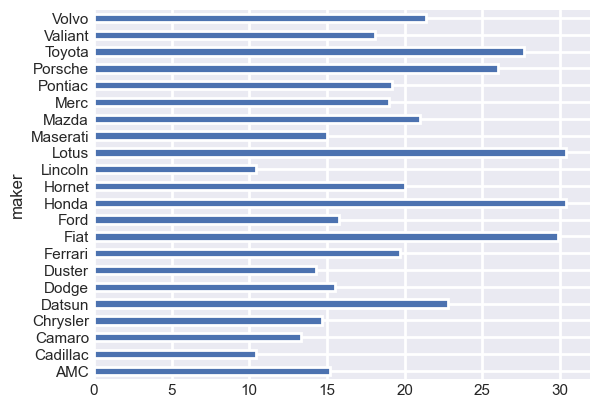

In [ ]:
with sns.plotting_context("poster", font_scale=0.5): # I added fontscale here to fix it
    ax = plt.gca()
    av_mpg.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    sns.despine(left=True, bottom=True)

It's important to understand what's going on under the hood. Try and write `sns.despine` on your own by looking up the matplotlib documentation.

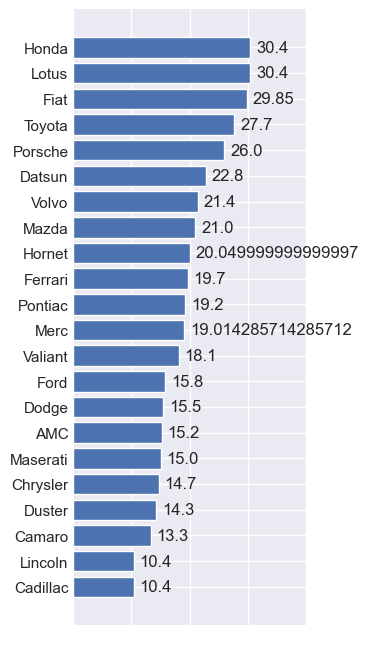

In [ ]:
plt.figure(figsize=(3, 8))
ax = plt.gca()
av_mpg2 = av_mpg.sort_values()
makes = av_mpg2.index
speeds = av_mpg2.values
nums = np.arange(len(av_mpg2))
plt.barh(nums, speeds)
for p, c, ch in zip(nums, makes, speeds):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, makes)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

## Histograms

Numerical data leads to distributions, and distributions to histograms. Here's the pandas default:

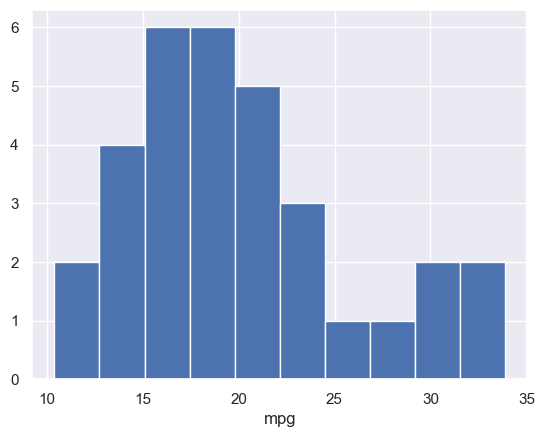

In [ ]:
dfcars.mpg.hist()
plt.xlabel("mpg");

And matplotlib:

(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <BarContainer object of 10 artists>)

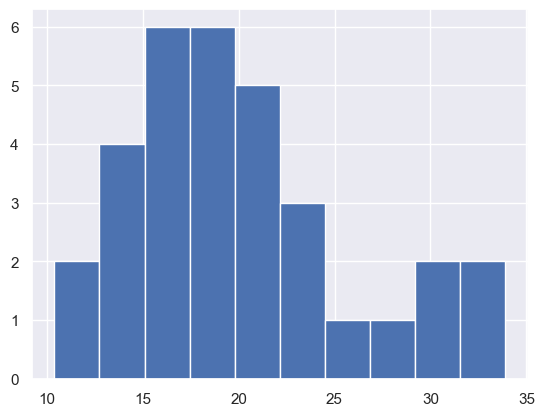

In [ ]:
plt.hist(dfcars.mpg.values)

Let's style it a bit with seaborn. The `with` syntax followed by indentation is a python construct called a "context manager". Here, it sets up a while axes style only for the code that's inside the context:

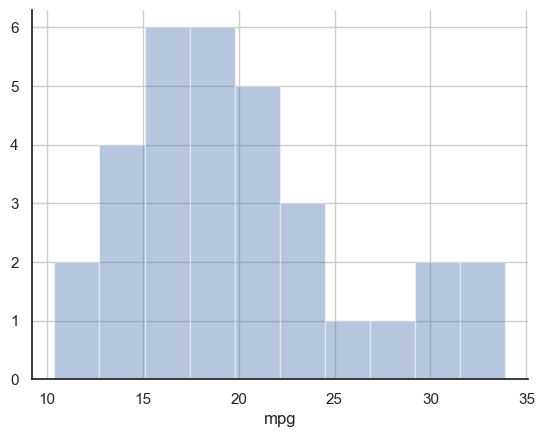

In [ ]:
with sns.axes_style("white"):
    dfcars.mpg.hist(alpha=0.4)
    plt.xlabel("mpg");
    sns.despine()

What if we wanted to get the benefit of the default seaborn style and colors?

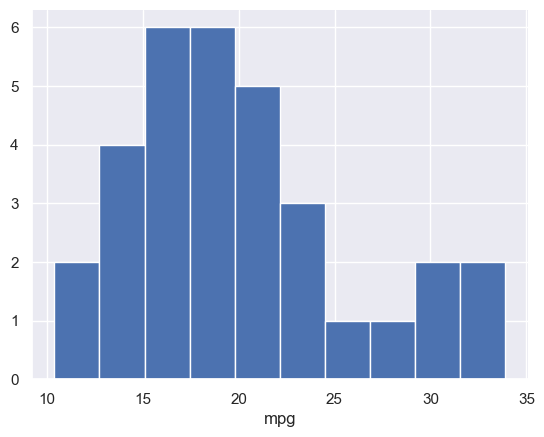

In [ ]:
sns.set()
dfcars.mpg.hist()
plt.xlabel("mpg");
sns.despine()

We can then reset the defaults back to matplotlib's:

In [ ]:
sns.reset_defaults()

Here are the most commonly used matplotlib plotting routines.

Here we use a white grid. We also illustrate how **a series can be converted to a numpy array with the `values` method** and how x and y limits can be set (the difference in the way `xlim` and `ylim` are called is on purpose and illustrates two ways you can set the limits). In the `hist` function you can also change the number of bins. We also show how to label a plot and obtain a legend from it. A vertical line is drawn at the mean.

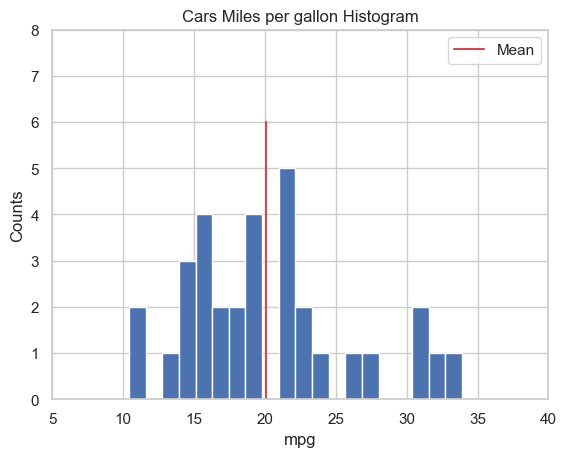

In [ ]:
with sns.axes_style("whitegrid"):
    plt.hist(dfcars.mpg.values, bins=20)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 0.75, color="r", label="Mean")
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

One can set bins using a list, and also label the histogram (not recommended but just for illustration). We also illustrate how to capture the color used and use it again.

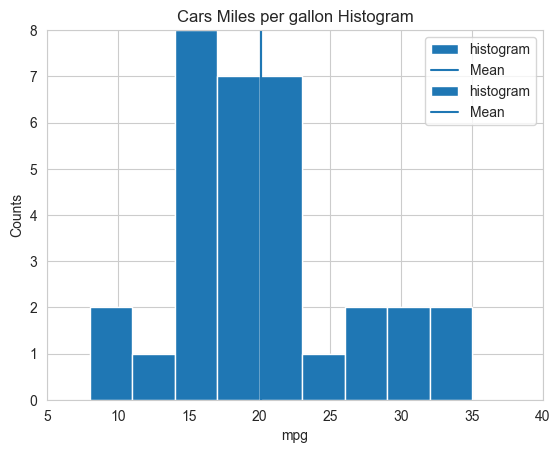

In [ ]:
with sns.axes_style("whitegrid"):
    color = sns.color_palette()[0]
    plt.hist(dfcars.mpg.values, bins=range(5, 40, 3), label="histogram", color=color)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 1.0, color=color, label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

Seaborn also provides Kernel Density Estimates (KDE) which try to infer a probability distribution from the data. This is more useful when you have lots of data.

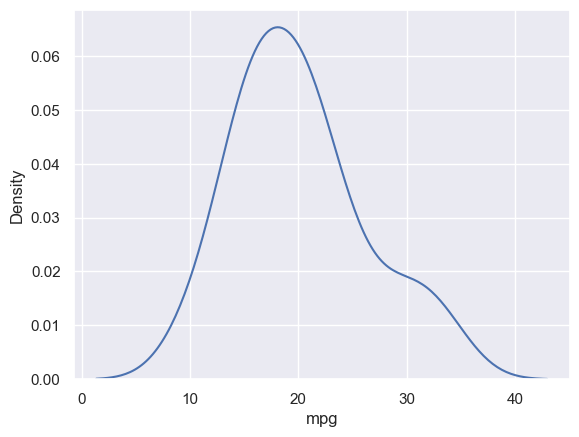

In [ ]:
sns.set()
sns.kdeplot(dfcars.mpg);

And here's a histogram and a kdeplot together:

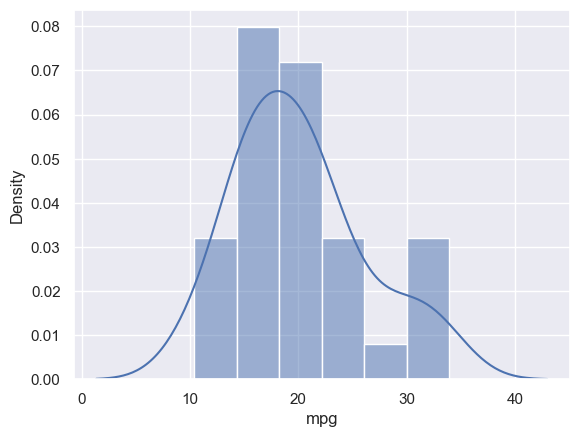

In [ ]:
sns.histplot(data=dfcars, x="mpg", kde=True, stat="density", kde_kws=dict(cut=3)); # Had to update this using the docs

And here's the deprecated way of doing it. The output above was done using the link provided by the deprecated warning. (A bit annoying that the deprecated way of doing it is way more simple).

/var/folders/m_/f7m4q3pj7j3f6tby_sb7n5280000gn/T/ipykernel_8029/1170275590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfcars.mpg);


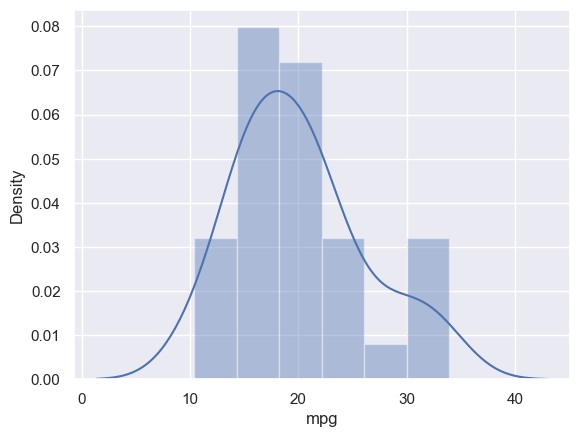

In [ ]:
sns.distplot(dfcars.mpg);

## Plotting features against other features

Sometimes we want to see co-variation amongst our columns. A scatter-plot does this for us:

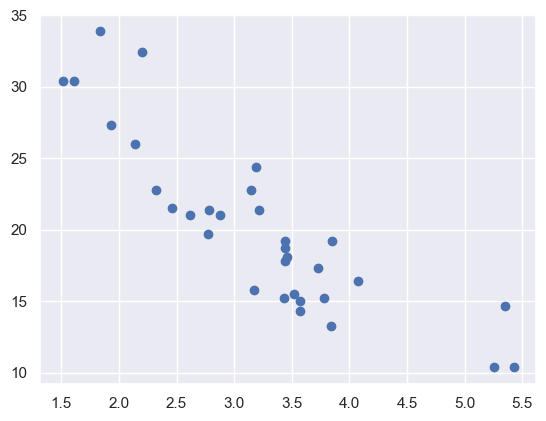

In [ ]:
plt.scatter(dfcars.wt, dfcars.mpg);

We can also use `plot` without lines:

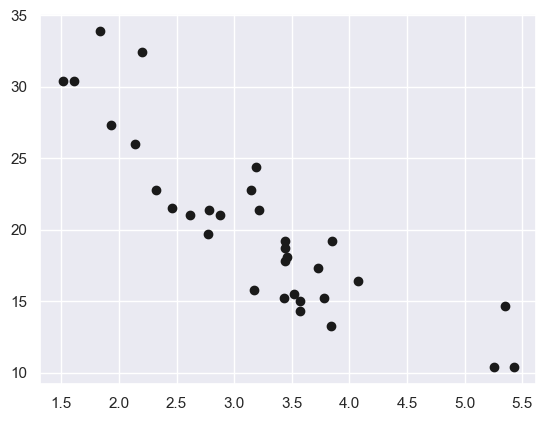

In [229]:
plt.plot(dfcars.wt, dfcars.mpg, marker="o", linestyle="None", color="k");

Usually we use `plt.show()` at the end of every plot to show the plot. Out magic incantation `%matplotlib inline` takes care of this for us, and we dont have to do it in the jupyter notebook. But if you run your python program from a file, you will need to explicitly have a call to show. Does not hurt us to include it...

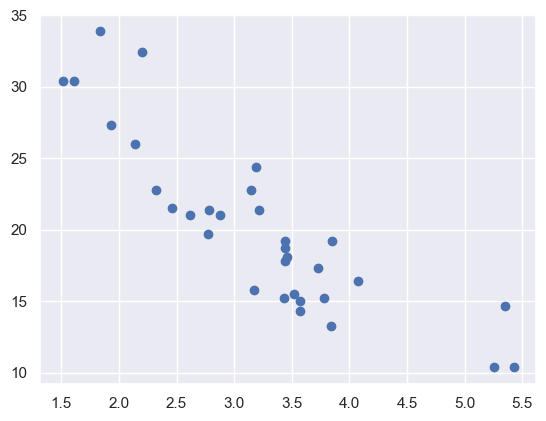

In [225]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.show()

## Trend

The correlation that we saw might suggest a trend. We can capture it with a regression. Here, we'll show a quadratic fit with a 1 standard deviation bar to show the graphics aspect of this. Also see `sns.regplot`.

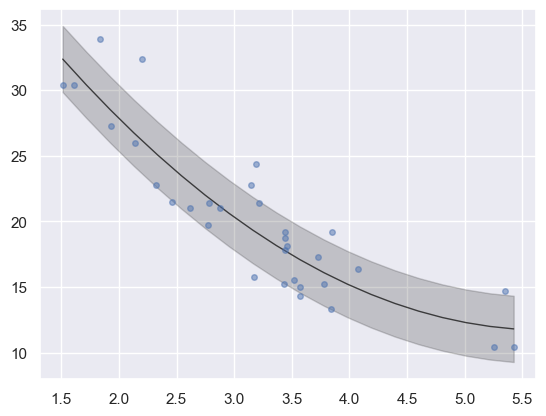

In [232]:
x = dfcars.wt
y = dfcars.mpg
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, "k", alpha=0.8, linewidth=1)
plt.plot(dfcars.wt, dfcars.mpg, "o", markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, color="k", alpha=0.2);